In [333]:
# Importamos las librerías.

# Tratamiento de datos.
import pandas as pd
import numpy as np

# Tratamiento de nulos.
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 

# Visualización.
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables (estadística).
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración.
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_talento = pd.read_csv('transformando_talento.csv')


## Fase 1. EDA

## 1.1 Exploración preliminar

In [ ]:
df_talento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1614 non-null   int64  
 1   Age                       1614 non-null   object 
 2   Attrition                 1614 non-null   object 
 3   BusinessTravel            842 non-null    object 
 4   DailyRate                 1614 non-null   object 
 5   Department                302 non-null    object 
 6   DistanceFromHome          1614 non-null   int64  
 7   Education                 1614 non-null   int64  
 8   EducationField            869 non-null    object 
 9   employeecount             1614 non-null   int64  
 10  employeenumber            1183 non-null   object 
 11  EnvironmentSatisfaction   1614 non-null   int64  
 12  Gender                    1614 non-null   int64  
 13  HourlyRate                1614 non-null   object 
 14  JobInvol

In [ ]:
display(df_talento.head(20))


,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0
5,5,48,No,NaN,"117,0$",Research & Development,22,3,Medical,1,"1900,0",4,1,58,3,4,MANAger,4,NaN,"17174,0",2437,3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"17174,0",1975,1000000000$,MANAger - Research & Development,NaN,Yes
6,6,59,No,NaN,"1435,0$",NaN,25,3,Life Sciences,1,"81,0",1,1,99,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,Y,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,NaN,1964,1000000000$,NaN,NaN,True
7,7,42,No,travel_rarely,"635,0$",NaN,1,1,NaN,1,"387,0",2,0,99,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,NaN,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,1000000000$,NaN,NaN,0
8,8,41,No,NaN,"1276,0$",NaN,2,5,NaN,1,NaN,2,1,91,3,4,mANAGEr,1,Married,"16595,0",5626,7,NaN,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,"16595,0",1982,1000000000$,NaN,NaN,True
9,9,41,No,travel_frequently,"840,0$",NaN,9,3,NaN,1,"999,0",1,0,64,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,NaN,1982,1000000000$,NaN,NaN,0


In [ ]:
round(df_talento.describe(), 2).T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1614.0,806.50,466.07,0.0,403.25,806.5,1209.75,1613.0
DistanceFromHome,1614.0,4.53,14.59,-49.0,2.00,5.0,11.00,29.0
Education,1614.0,2.93,1.02,1.0,2.00,3.0,4.00,5.0
employeecount,1614.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1614.0,4.29,6.99,1.0,2.00,3.0,4.00,49.0
Gender,1614.0,0.40,0.49,0.0,0.00,0.0,1.00,1.0
JobInvolvement,1614.0,2.74,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,1614.0,2.07,1.10,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1614.0,2.74,1.11,1.0,2.00,3.0,4.00,4.0
MonthlyRate,1614.0,14284.50,7110.41,2094.0,8001.00,14248.5,20364.00,26999.0


In [ ]:
print(df_talento.columns)


Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')


In [339]:
# Ver los porcentajes de nulos de las columnas numéricas, pero que solo nos muestre los que son mayores que 0.
null_percent = (df_talento.isnull().sum() / len(df_talento) * 100).sort_values(ascending=False)
null_percent[null_percent > 0]


NUMBERCHILDREN         100.000000
YearsInCurrentRole      97.893432
RoleDepartament         81.288724
Department              81.288724
StandardHours           74.039653
Over18                  55.824040
SameAsMonthlyIncome     52.230483
MonthlyIncome           52.230483
BusinessTravel          47.831475
EducationField          46.158612
OverTime                41.883519
MaritalStatus           40.334572
TOTALWORKINGYEARS       32.589839
employeenumber          26.703841
PerformanceRating       12.081784
WORKLIFEBALANCE          6.691450
dtype: float64

In [ ]:
# Ver si hay registros duplicados.
df_talento[df_talento.duplicated(keep=False)]
df_talento.duplicated().sum()


0

🔎 Tras esta primera exploracion vemos que el dataset tiene 1614 filas, 42 columnas y que estan organizadas de modo alfabetico.

        Los principales problemas son:
- La grandisima cantidad de valores nulos que hay en algunas columnas.
- Registros duplicados en su totalidad.
- Los numerosos formatos irregulares.
- Columnas redundantes.
- Columnas con pocos datos útiles.
- Columnas con valores numericos en tipo object.


⚀ Como primer paso, debido a la ausencia de regularidad en las columnas, vamos a normalizar sus nombres, poniendo todo en minusculas y reemplazando espacios con "_". 

*Vamos a tomar esta norma para todos los datos del dataset*.

In [341]:
df_talento.columns = df_talento.columns.str.lower().str.replace(" ", "_")
df_talento.rename(columns={
    "roledepartament": "role_department",
    "totalworkingyears": "total_working_years",
    "businesstravel": "business_travel",
    "employeenumber": "employee_number",
    "environmentsatisfaction": "environment_satisfaction",
    "jobinvolvement": "job_involvement",
    "joblevel": "job_level",
    "jobsatisfaction": "job_satisfaction",
    "monthlyincome": "monthly_income",
    "monthlyrate": "monthly_rate",
    "distancefromhome": "distance_from_home",
    "educationfield": "education_field",
    "employeecount": "employee_count",
    "numcompaniesworked": "num_companies_worked",
    "over18": "over_18",
    "performancerating": "performance_rating",
    "standardhours": "standard_hours",
    "yearsatcompany": "years_at_company",
    "yearsincurrentrole": "years_in_current_role",
    "yearssincelastpromotion": "years_since_last_promotion",
    "yearswithcurrmanager": "years_with_curr_manager",
    "datebirth": "date_birth",
    "remotework": "remote_work",
    "numberchildren": "num_children",
    "sameasmonthlyincome": "same_as_monthly_income",
    "dailyrate": "daily_rate",
    "hourlyrate": "hourly_rate",
    "jobrole": "job_role",
    "maritalstatus": "marital_status",
    "percentsalaryhike": "percent_salary_hike",
    "relationshipsatisfaction": "relationship_satisfaction",
    "stockoptionlevel": "stock_option_level",
    "trainingtimeslastyear": "training_times_last_year",
    "worklifebalance": "work_life_balance"
}, inplace=True)


In [ ]:
print(df_talento.columns)


Index(['unnamed:_0', 'age', 'attrition', 'business_travel', 'daily_rate',
       'department', 'distance_from_home', 'education', 'education_field',
       'employee_count', 'employee_number', 'environment_satisfaction',
       'gender', 'hourly_rate', 'job_involvement', 'job_level', 'job_role',
       'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over_18', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'same_as_monthly_income', 'date_birth', 'salary', 'role_department',
       'num_children', 'remote_work'],
      dtype='object')


In [ ]:
df_talento.sample(10)


,unnamed:_0,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_department,num_children,remote_work
44,44,46,No,NaN,"1003,0$",NaN,8,4,Life Sciences,1,"1080,0",4,1,74,2,2,RESEarch SCIenTisT,1,Divorced,"4615,0",21029,8,NaN,Yes,23,"4,0",1,NaN,3,NaN,2,"3,0",16,NaN,1,7,"4615,0",1977,1000000000$,NaN,NaN,0
331,331,53,No,NaN,"238,0$",Sales,1,1,NaN,1,"682,0",4,1,34,3,2,SALEs eXecuTiVE,1,Single,NaN,7507,7,Y,NaN,20,"4,0",4,NaN,0,"18,0",2,"4,0",14,NaN,8,10,NaN,1970,1000000000$,SALEs eXecuTiVE - Sales,NaN,False
819,819,44,No,NaN,"489,0$",NaN,23,3,NaN,1,"132,0",2,0,Not Available,3,2,LabOrAtory TechNIcIan,2,Married,NaN,25043,4,NaN,NaN,12,"3,0",3,NaN,1,NaN,3,"4,0",3,NaN,1,2,NaN,1979,1000000000$,NaN,NaN,True
911,911,29,No,travel_rarely,"232,0$",NaN,19,3,Technical Degree,1,"611,0",4,0,34,3,2,MAnUfACturINg DIrecTOR,4,Divorced,"4262,0",22645,4,Y,No,12,"3,0",2,NaN,2,"8,0",2,"4,0",3,"2,0",1,2,"4262,0",1994,1000000000$,NaN,NaN,Yes
279,279,32,No,NaN,"689,0$",NaN,9,2,NaN,1,"195,0",4,0,35,1,2,SaLEs ExEcUtiVe,4,Divorced,"4668,0",22812,0,Y,No,17,"3,0",4,NaN,3,NaN,2,"4,0",8,NaN,0,7,"4668,0",1991,1000000000$,NaN,NaN,True
886,886,29,No,NaN,"1283,0$",Research & Development,-17,3,NaN,1,"495,0",17,0,54,3,1,ReseArCh SciENTIsT,4,NaN,NaN,18168,9,NaN,No,16,NaN,4,NaN,0,"6,0",4,"3,0",3,NaN,1,2,NaN,1994,1000000000$,ReseArCh SciENTIsT - Research & Development,NaN,0
501,501,35,No,travel_rarely,"1137,0$",Research & Development,21,1,Life Sciences,1,"942,0",4,1,51,3,2,HeAlThCarE rEpreSentatiVe,4,Married,"4014,0",19170,1,NaN,NaN,25,"4,0",4,NaN,1,"10,0",2,"1,0",10,NaN,0,7,"4014,0",1988,1000000000$,HeAlThCarE rEpreSentatiVe - Research & Deve...,NaN,True
195,195,38,No,NaN,"849,0$",NaN,25,2,Life Sciences,1,"421,0",1,1,81,2,3,rEseaRch DIRECTOr,2,NaN,NaN,26707,3,Y,NaN,17,"3,0",3,NaN,1,NaN,2,"3,0",10,NaN,0,1,NaN,1985,1000000000$,NaN,NaN,1
434,434,48,No,NaN,nan$,Sales,16,4,Life Sciences,1,NaN,3,1,96,3,2,saLeS exECUtive,3,Divorced,"6439,0",13693,8,NaN,No,14,"3,0",3,NaN,1,"18,0",2,NaN,8,NaN,7,7,"6439,0",1975,1000000000$,saLeS exECUtive - Sales,NaN,1
1429,1429,45,No,travel_rarely,"176,0$",NaN,-41,3,Life Sciences,1,"1744,0",41,1,56,1,3,huMAn ReSOurCES,3,Marreid,"9756,0",6595,4,NaN,NaN,21,"4,0",3,NaN,2,"9,0",2,"4,0",5,NaN,0,3,"9756,0",1978,1000000000$,NaN,NaN,Yes


**LIMPIEZA POR ORDEN DE APARICION EN .INFO**

 Dada la complejidad de este data set y para intentar evitar dejar errores por el camino, pasamos a revisar columna por columna examinando detenidamente los datos y actuando en consecuencia. Este puede ser el método más lento pero así podremos comprender bien el significado de cada columna.

In [ ]:
# Hay que tener en cuenta el % de nulos que vamos a ir encontrando en cada columna.
nan_columns = df_talento[df_talento.columns[df_talento.isnull().any()]]

for col in nan_columns:
    print(f"La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna", col)
    display(df_talento[col].value_counts(dropna=False, normalize=True) * 100) 
    print("........................")
    

La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna business_travel


business_travel
NaN                  47.831475
travel_rarely        36.307311
travel_frequently    10.223048
non-travel            5.638166
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna department


department
NaN                         81.288724
 Research & Development     12.143742
 Sales                       5.638166
 Human Resources             0.929368
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna education_field


education_field
NaN                 46.158612
Life Sciences       21.623296
Medical             17.100372
Marketing            6.443618
Technical Degree     4.275093
Other                3.655514
Human Resources      0.743494
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna employee_number


employee_number
NaN       26.703841
482,0      0.123916
530,0      0.123916
507,0      0.123916
517,0      0.123916
            ...    
161,0      0.061958
164,0      0.061958
190,0      0.061958
194,0      0.061958
2040,0     0.061958
Name: proportion, Length: 1080, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna marital_status


marital_status
NaN         40.334572
Married     25.030979
Single      20.136307
Divorced    11.648079
Marreid      2.168525
divorced     0.681537
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna monthly_income


monthly_income
NaN        52.230483
6347,0      0.247831
5304,0      0.247831
2657,0      0.185874
2258,0      0.185874
             ...    
3102,0      0.061958
4556,0      0.061958
4230,0      0.061958
4859,0      0.061958
19431,0     0.061958
Name: proportion, Length: 669, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna over_18


over_18
NaN    55.82404
Y      44.17596
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna overtime


overtime
No     42.255266
NaN    41.883519
Yes    15.861214
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna performance_rating


performance_rating
3,0    74.659232
4,0    13.258984
NaN    12.081784
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna standard_hours


standard_hours
NaN     74.039653
80,0    25.960347
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna total_working_years


total_working_years
NaN     32.589839
10,0     8.921933
8,0      5.328377
6,0      5.204461
9,0      4.275093
5,0      4.089219
7,0      3.469641
4,0      3.345725
1,0      3.283767
12,0     2.106568
3,0      1.982652
13,0     1.858736
14,0     1.858736
11,0     1.796778
16,0     1.734820
15,0     1.734820
20,0     1.734820
18,0     1.672862
21,0     1.425031
17,0     1.363073
2,0      1.301115
22,0     1.115242
19,0     1.053284
24,0     0.867410
23,0     0.805452
28,0     0.805452
0,0      0.495663
26,0     0.495663
36,0     0.371747
29,0     0.371747
25,0     0.371747
33,0     0.371747
37,0     0.309789
27,0     0.309789
31,0     0.247831
35,0     0.185874
32,0     0.185874
30,0     0.185874
40,0     0.185874
34,0     0.123916
38,0     0.061958
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna work_life_balance


work_life_balance
3,0    56.567534
2,0    22.242875
4,0     9.603470
NaN     6.691450
1,0     4.894672
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna years_in_current_role


years_in_current_role
NaN     97.893432
2,0      0.681537
7,0      0.309789
0,0      0.247831
4,0      0.185874
1,0      0.185874
11,0     0.123916
6,0      0.123916
3,0      0.123916
13,0     0.061958
12,0     0.061958
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna same_as_monthly_income


same_as_monthly_income
NaN        52.230483
6347,0      0.247831
5304,0      0.247831
2657,0      0.185874
2258,0      0.185874
             ...    
3102,0      0.061958
4556,0      0.061958
4230,0      0.061958
4859,0      0.061958
19431,0     0.061958
Name: proportion, Length: 669, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna role_department


role_department
NaN                                                       81.288724
 MaNAgeR  -  Sales                                         0.123916
 ReseaRch scIENTisT  -  Research & Development             0.061958
 ManufacTURInG DIRECtOR  -  Research & Development         0.061958
 hEalthCaRe reprEseNTaTiVe  -  Research & Development      0.061958
                                                            ...    
 saLES eXEcUTiVE  -  Sales                                 0.061958
 mANUfacTURiNG dIRectOR  -  Research & Development         0.061958
 huMAn ResOurces  -  Human Resources                       0.061958
 HUMAN ResoURCeS  -  Human Resources                       0.061958
 sAleS EXECUtIvE  -  Sales                                 0.061958
Name: proportion, Length: 302, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna num_children


num_children
NaN    100.0
Name: proportion, dtype: float64

........................


In [345]:
#1️⃣ UNNAMED:_0: Parece un índice predeterminado repetido. Eliminamos la columna y verificamos que se ha eliminado.
df_talento.drop(columns=['unnamed:_0'], inplace=True)


In [ ]:
df_talento.head(10)


,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_department,num_children,remote_work
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0
5,48,No,NaN,"117,0$",Research & Development,22,3,Medical,1,"1900,0",4,1,58,3,4,MANAger,4,NaN,"17174,0",2437,3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"17174,0",1975,1000000000$,MANAger - Research & Development,NaN,Yes
6,59,No,NaN,"1435,0$",NaN,25,3,Life Sciences,1,"81,0",1,1,99,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,Y,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,NaN,1964,1000000000$,NaN,NaN,True
7,42,No,travel_rarely,"635,0$",NaN,1,1,NaN,1,"387,0",2,0,99,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,NaN,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,1000000000$,NaN,NaN,0
8,41,No,NaN,"1276,0$",NaN,2,5,NaN,1,NaN,2,1,91,3,4,mANAGEr,1,Married,"16595,0",5626,7,NaN,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,"16595,0",1982,1000000000$,NaN,NaN,True
9,41,No,travel_frequently,"840,0$",NaN,9,3,NaN,1,"999,0",1,0,64,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,NaN,1982,1000000000$,NaN,NaN,0


In [347]:
#2️⃣ AGE: Esta como object y deberia ser un int. Además hay edades que estan escritas con letras.
print(df_talento["age"].sample(6))
print(df_talento["age"].unique())


423     54
472     26
510     35
1522    30
99      51
762     53
Name: age, dtype: object
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']


In [348]:
# Normalizamos, paso a int y verificamos.
age_map = {
    "forty-seven": 47, "fifty-eight": 58, "thirty-six": 36, "fifty-five": 55, "fifty-two": 52, "thirty-one": 31, "thirty": 30, "twenty-six": 26, "thirty-seven": 37, "thirty-two": 32, "twenty-four": 24}
df_talento["age"] = df_talento["age"].replace(age_map)
df_talento["age"] = df_talento["age"].astype(int)
print(df_talento["age"].describe())


count    1614.000000
mean       36.920694
std         9.102157
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64


In [ ]:
#3️⃣ ATTRITION: Indica si el empleado ha dejado la empresa o no.
print(df_talento["attrition"].unique())

# Tiene valores normales, pero seguimos la norma que hemos tomado de todo en minusculas y separaciones con _ 
df_talento['attrition'] = df_talento['attrition'].str.lower().str.strip()
print(df_talento["attrition"].unique())


['No' 'Yes']
['no' 'yes']


In [ ]:
#4️⃣ BUSINESS TRAVEL: Define la frecuencia de viajes por trabajo.
print(df_talento["business_travel"].unique())
print(df_talento['business_travel'].value_counts(dropna=False))
round((df_talento['business_travel'].isnull().sum() / len(df_talento)) * 100, 2)

# Los valores ya estan normalizados según la norma pero encontramos nulos que debemos gestionar.


[nan 'travel_rarely' 'travel_frequently' 'non-travel']
business_travel
NaN                  772
travel_rarely        586
travel_frequently    165
non-travel            91
Name: count, dtype: int64


47.83

In [ ]:
# Creamos una nueva categoria "unknown" para agrupar ese 47% de valores nulos.
df_talento['business_travel'] = df_talento['business_travel'].fillna('unknown')
print(df_talento['business_travel'].isnull().sum())


0


In [ ]:
#5️⃣ DAILY RATE: Tarifa por hora. 
# Deberia ser numérica pero es object pues tiene comas y simbolo del dinero. Además hay un 'nan$' que tenemos que tratar.
print(df_talento["daily_rate"].unique())
print(df_talento['daily_rate'].isnull().sum())
round((df_talento['daily_rate'].isnull().sum() / len(df_talento)) * 100, 2)


['684,0$' '699,0$' '532,0$' '359,0$' '1319,0$' '117,0$' '1435,0$' '635,0$'
 '1276,0$' '840,0$' '247,0$' '1369,0$' '201,0$' '1360,0$' '692,0$'
 '1398,0$' '286,0$' '1402,0$' '819,0$' '884,0$' '1238,0$' '515,0$'
 '1223,0$' '202,0$' '928,0$' '607,0$' '266,0$' '429,0$' '589,0$' 'nan$'
 '1180,0$' '1282,0$' '776,0$' '665,0$' '526,0$' '1034,0$' '1403,0$'
 '1499,0$' '580,0$' '859,0$' '263,0$' '1376,0$' '885,0$' '1003,0$'
 '1321,0$' '394,0$' '1372,0$' '1333,0$' '228,0$' '737,0$' '823,0$'
 '667,0$' '301,0$' '573,0$' '1329,0$' '630,0$' '1063,0$' '1017,0$'
 '1296,0$' '939,0$' '1355,0$' '1448,0$' '200,0$' '1202,0$' '404,0$'
 '208,0$' '813,0$' '465,0$' '1189,0$' '1001,0$' '1394,0$' '161,0$'
 '288,0$' '682,0$' '1354,0$' '147,0$' '119,0$' '1413,0$' '452,0$' '334,0$'
 '1132,0$' '982,0$' '480,0$' '1099,0$' '672,0$' '1379,0$' '583,0$'
 '1492,0$' '1050,0$' '469,0$' '237,0$' '1440,0$' '1291,0$' '1157,0$'
 '1336,0$' '1224,0$' '735,0$' '1389,0$' '638,0$' '1240,0$' '194,0$'
 '1339,0$' '111,0$' '1469,0$' '470,0

0.0

In [353]:
# Quitamos '$', pasamos las comas a puntos y el 'nan$' lo pasamos a nulo. 
# Al tener nulos pasamos la columna a float.
df_talento["daily_rate"] = (df_talento["daily_rate"].str.replace("$", "", regex=False).str.replace(",", ".", regex=False).replace("nan", np.nan).astype(float))
print(df_talento["daily_rate"].describe())


count    1490.000000
mean      802.085235
std       403.246954
min       103.000000
25%       468.250000
50%       798.000000
75%      1157.000000
max      1499.000000
Name: daily_rate, dtype: float64


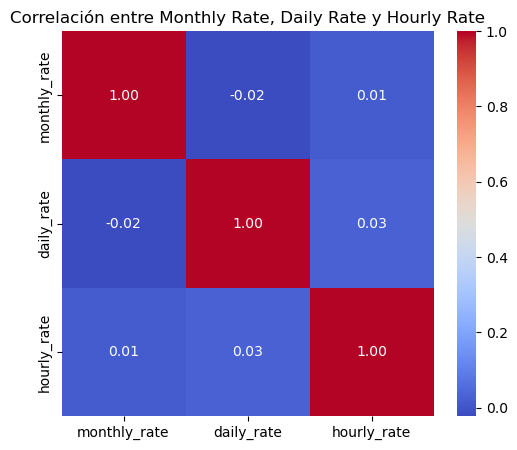

In [354]:
# Hacemos un grafico para ver la relacion entre las otras columnas que a priori pudieran tener relacion con los ingresos de los trabajadores.
cols_tasa = ['monthly_rate', 'daily_rate', 'hourly_rate']
df_rates = df_talento[cols_tasa].apply(pd.to_numeric, errors='coerce')
corr_rates = df_rates.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_rates, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Monthly Rate, Daily Rate y Hourly Rate')
plt.show()

🔍 Según vemos, estas columnas no estan relacionadas entre si, ni con la columna que quizá más nos podría interesar que es Monthly Income. 
Tampoco creemos que ninguna de estas tres columnas nos aporten un valor añadido al analisis, por lo que, decidimos eliminarlas para evitar ruino innecesario en las imputaciones y en los analisis. 

In [ ]:
# Verificamos para asegurarnos de una correcta eliminación.

df_talento.drop(['monthly_rate', 'daily_rate', 'hourly_rate'], axis=1, inplace=True)
print(df_talento.columns.tolist())


['age', 'attrition', 'business_travel', 'department', 'distance_from_home', 'education', 'education_field', 'employee_count', 'employee_number', 'environment_satisfaction', 'gender', 'job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'marital_status', 'monthly_income', 'num_companies_worked', 'over_18', 'overtime', 'percent_salary_hike', 'performance_rating', 'relationship_satisfaction', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'work_life_balance', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager', 'same_as_monthly_income', 'date_birth', 'salary', 'role_department', 'num_children', 'remote_work']


In [ ]:
#6️⃣ DEPARTMENT: Nos encontramos con una columna con una amplia cantidad de nulos.
print(df_talento["department"].unique())
print(df_talento['department'].isnull().sum())
round((df_talento['department'].isnull().sum() / len(df_talento)) * 100, 2)


[nan ' Research & Development ' ' Sales ' ' Human Resources ']
1312


81.29

In [357]:
# Estandarizamos los datos siguiendo la norma pactada y rellenamos los nulos creando una nueva categoria: unknown.
df_talento["department"] = df_talento["department"].str.strip().str.replace(" ", "_").str.lower()
df_talento["department"]= df_talento["department"].fillna("unknown")
print(df_talento["department"].unique())


['unknown' 'research_&_development' 'sales' 'human_resources']


In [ ]:
#7️⃣ DISTANCE FROM HOME.
print(df_talento["distance_from_home"].describe())
print(df_talento["distance_from_home"].unique()[:20]) 


count    1614.000000
mean        4.527261
std        14.591913
min       -49.000000
25%         2.000000
50%         5.000000
75%        11.000000
max        29.000000
Name: distance_from_home, dtype: float64
[  6   1   4   2   3  22  25   9   7  23  10  12  14 -13  15   8 -42  28
 -37   5]


In [359]:
# Tiene 192 valores en negativo.
valores_negativos = df_talento[df_talento['distance_from_home'] < 0]
conteo_negativos = valores_negativos['distance_from_home'].value_counts()
print(conteo_negativos)


distance_from_home
-13    11
-24    11
-12    11
-18     8
-38     7
-35     7
-47     7
-14     6
-42     6
-36     6
-19     6
-25     6
-31     6
-26     6
-48     5
-46     5
-22     5
-16     5
-10     5
-45     5
-32     4
-20     4
-37     4
-41     4
-29     4
-30     4
-27     4
-23     3
-11     3
-33     3
-15     3
-17     3
-44     3
-28     2
-34     2
-49     2
-21     2
-43     2
-39     1
-40     1
Name: count, dtype: int64


In [ ]:
# Tras consultar con el product owner vemos que ha sido un error a la hora de registrar los datos y que son errores de signo.
# Pasamos los valores negativos a positivos y confirmo que se ha ejecutado correctamente.
df_talento["distance_from_home"] = df_talento["distance_from_home"].abs() 
print(df_talento["distance_from_home"].describe())


count    1614.000000
mean       11.141884
std        10.450560
min         1.000000
25%         2.000000
50%         8.000000
75%        17.000000
max        49.000000
Name: distance_from_home, dtype: float64


In [ ]:
#8️⃣ EDUCATION: Da una salida numerica que podría estar ordenada de menor grado educativo (1) a mayor nivel (5).
# Lo tomaremos como: 1- Secundaria o Superior, 2- Bachiller, 3- Grado Universitario, 4- Master, 5- Doctorado. 
# No tiene nulos.
print(df_talento["education"].unique())
print(df_talento['education'].isnull().sum())


[3 4 2 1 5]
0


In [ ]:
#9️⃣ EDUCATION FIELD: Presenta ciertas irregularidades que equiparamos con la norma y encontramos un alto número de nulos.
print(df_talento["education_field"].unique())
df_talento["education_field"] = df_talento["education_field"].str.strip().str.lower().str.replace(" ", "_")
print(df_talento["education_field"].unique())
print(df_talento['education_field'].isnull().sum())


[nan 'Life Sciences' 'Technical Degree' 'Medical' 'Other' 'Marketing'
 'Human Resources']
[nan 'life_sciences' 'technical_degree' 'medical' 'other' 'marketing'
 'human_resources']
745


In [ ]:
# Creamos una nueva categoria para el alto porcentaje de nulos de education field y verificamos.
df_talento["education_field"]= df_talento["education_field"].fillna("unknown")
df_talento["education_field"].value_counts()


education_field
unknown             745
life_sciences       349
medical             276
marketing           104
technical_degree     69
other                59
human_resources      12
Name: count, dtype: int64

In [ ]:
#🔟 EMPLOYEE COUNT: Observamos que tiene un único valor (1) para todos los registros. 
# Como no nos aporta ningún valor al análisis, la borramos.
print(df_talento["employee_count"].unique())
df_talento.drop(columns=["employee_count"], inplace=True)
print(df_talento.columns)


[1]
Index(['age', 'attrition', 'business_travel', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
       'job_role', 'job_satisfaction', 'marital_status', 'monthly_income',
       'num_companies_worked', 'over_18', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'same_as_monthly_income', 'date_birth', 'salary', 'role_department',
       'num_children', 'remote_work'],
      dtype='object')


In [365]:
#1️⃣1️⃣ EMPLOYEE NUMBER: Es una columna object cuando es númerica y nos da el númedo de identificador único de cada trabajador.
print(df_talento["employee_number"].sample(10))


261     2000,0
1488    1135,0
755     1554,0
705      655,0
547        NaN
647     1664,0
108        NaN
704        NaN
781     1947,0
951        NaN
Name: employee_number, dtype: object


In [366]:
# Limpiamos y sustituimos los nulos por unknown.
print(df_talento["employee_number"].dtype)
df_talento["employee_number"] = df_talento["employee_number"].fillna("unknown")
df_talento['employee_number'] = df_talento['employee_number'].str.split(',').str[0]
print(f"Porcentaje de Unknown: {(df_talento['employee_number'].eq('unknown').mean() * 100):.2f}%")


object
Porcentaje de Unknown: 26.70%


In [ ]:
# Ahora que ya hemos hecho una regularizacion inicial y dado el alto porcentaje de empleados de los que no sabemos su identificador unico vamos a revisar si hay duplicados.
df_talento[df_talento['employee_number'].duplicated(keep=False)].sort_values('employee_number')

# Encontramos duplicados pero con muy pequeñas diferencias, por lo que seguimos limpiando el dataset antes de gestionar los duplicados.


,age,attrition,business_travel,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,num_companies_worked,over_18,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,date_birth,salary,role_department,num_children,remote_work
1483,33,no,non-travel,sales,8,1,life_sciences,1044,2,1,2,1,sales repResENTaTiVE,4,NaN,NaN,0,Y,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,NaN,1990,1000000000$,sales repResENTaTiVE - Sales,NaN,0
987,33,no,non-travel,sales,8,1,life_sciences,1044,2,1,2,1,sALES ReprEsentatiVE,4,NaN,NaN,0,Y,NaN,19,"3,0",4,NaN,0,NaN,2,"2,0",2,NaN,2,2,NaN,1990,1000000000$,sALES ReprEsentatiVE - Sales,NaN,False
1484,26,yes,unknown,unknown,2,3,life_sciences,1053,1,0,3,1,reSEArcH SCiEnTIst,1,Married,"2042,0",6,Y,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,"2042,0",1997,1000000000$,NaN,NaN,Yes
988,26,yes,unknown,unknown,2,3,life_sciences,1053,1,0,3,1,rEsEaRCH SCIenTiSt,1,Married,"2042,0",6,Y,NaN,14,"3,0",2,NaN,1,"6,0",2,"3,0",3,NaN,1,2,"2042,0",1997,1000000000$,NaN,NaN,1
1486,46,no,unknown,unknown,1,4,medical,1069,4,0,3,5,rESEArCh DIrecTOR,4,NaN,NaN,9,NaN,No,17,"3,0",4,"80,0",2,"23,0",0,"3,0",2,NaN,2,2,NaN,1977,1000000000$,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,35,no,travel_rarely,unknown,8,4,technical_degree,unknown,3,0,3,1,HUMaN RESoUrCES,3,NaN,"4323,0",1,Y,No,17,"3,0",2,NaN,0,"6,0",2,"1,0",5,NaN,1,4,"4323,0",1988,1000000000$,NaN,NaN,1
610,54,no,unknown,unknown,2,4,life_sciences,unknown,3,1,2,3,sALES ExeCutiVe,3,Married,NaN,6,Y,No,11,"3,0",2,"80,0",1,"13,0",4,"3,0",9,NaN,7,0,NaN,1969,1000000000$,NaN,NaN,Yes
607,30,no,travel_rarely,unknown,8,2,unknown,unknown,3,0,3,3,SAles ExecutIve,3,NaN,NaN,5,NaN,No,11,"3,0",1,NaN,1,NaN,2,"4,0",8,NaN,7,7,NaN,1993,1000000000$,NaN,NaN,0
661,31,no,non-travel,unknown,5,3,medical,unknown,2,0,3,2,mAnuFaCTUrING direCTor,1,NaN,"9936,0",0,Y,No,19,"3,0",2,NaN,0,"10,0",2,"3,0",9,NaN,1,7,"9936,0",1992,1000000000$,NaN,NaN,Yes


In [ ]:
#1️⃣2️⃣ ENVIRONMENT SATISFACTION: Tras consultar con el Product Owner nos confirma que es una escala de valores del 1 al 4 que puntua la satisfacción de los trabajadores de menor a mayor.
print(df_talento["environment_satisfaction"].unique()) 
print(df_talento["environment_satisfaction"].value_counts())
valores_fuera_rango = df_talento[~df_talento["environment_satisfaction"].isin([1, 2, 3, 4])]
cantidad_fuera_rango = valores_fuera_rango.shape[0]
print(cantidad_fuera_rango)

# Hay 100 valores que no corresponden dentro de la escala, es un 6% de errores.


[ 1  3  4  2 42 37 35 25 27 31 39 21 15 14 33 19 12 13 28 47 36 29 24 46
 16 22 41 49 11 48 18 10 45 38 17 20 26 43]
environment_satisfaction
4     460
3     459
1     298
2     297
12      7
35      6
13      6
14      5
24      5
47      5
36      4
48      4
41      4
46      4
42      4
45      3
11      3
22      3
17      3
18      3
20      3
25      3
27      3
37      2
29      2
19      2
38      2
31      2
15      2
16      2
26      1
39      1
10      1
49      1
21      1
28      1
33      1
43      1
Name: count, dtype: int64
100


In [ ]:
# Calculamos la mediana, media y moda solo con los valores dentro del rango correcto y vemos que aunque no es una distribucción perfecta no esta nada desequilibrada.
mediana_valida = df_talento.loc[df_talento["environment_satisfaction"].isin([1, 2, 3, 4]), "environment_satisfaction"].median()
print(f"La mediana es: {mediana_valida}")
moda_valida = df_talento.loc[df_talento["environment_satisfaction"].isin([1, 2, 3, 4]), "environment_satisfaction"].mode()
print(f"La moda es: {moda_valida}")
media_valida = df_talento.loc[df_talento["environment_satisfaction"].isin([1, 2, 3, 4]), "environment_satisfaction"].mean()
print(f"La media es: {media_valida}")


La mediana es: 3.0
La moda es: 0    4
Name: environment_satisfaction, dtype: int64
La media es: 2.714002642007926


In [370]:
# Imputamos por la mediana los valores que estaban fuera de la escala.
mediana_environment = df_talento.loc[df_talento["environment_satisfaction"].isin([1, 2, 3, 4]), "environment_satisfaction"].median()
print(mediana_environment)
df_talento.loc[~df_talento["environment_satisfaction"].isin([1, 2, 3, 4]), "environment_satisfaction"] = mediana_environment
print(df_talento["environment_satisfaction"].unique())


3.0
[1 3 4 2]


In [371]:
#1️⃣3️⃣ GENDER: Tiene valores unicos son 0 y 1.
# Para hacerlo más comprensible, asigno 0 a male y 1 a female.
print(df_talento["gender"].unique())
df_talento["gender"] = df_talento["gender"].map({0: "male", 1: "female"})
print(df_talento["gender"].unique())


[0 1]
['male' 'female']


In [ ]:
#1️⃣4️⃣ HOURLY RATE: Columna eliminada anteriormente por no tener impacto en el analisis.


In [ ]:
#1️⃣5️⃣ JOB INVOLVEMENT: Es una escala de valores del 1 al 4 y tras hablar con el Product Owner nos confirma que mide la implicacion de los trabajadores de menor a mayor.
print(df_talento["job_involvement"].unique())
print(df_talento["job_involvement"].value_counts())


[3 2 4 1]
job_involvement
3    955
2    406
4    164
1     89
Name: count, dtype: int64


In [ ]:
#1️⃣6️⃣ JOB LEVEL: Indica la el nivel jerárquico de la empresa de menor a mayor responsabilidad.
print(df_talento["job_level"].unique())
print(df_talento["job_level"].value_counts())


[5 4 3 2 1]
job_level
2    597
1    586
3    242
4    113
5     76
Name: count, dtype: int64


In [ ]:
#1️⃣7️⃣ JOB ROLE: Indica el puesto de trabajo del empleado, no tiene nulos pero presenta diversidad de escritura de sus valores.
print(df_talento["job_role"].unique())
print(df_talento["job_role"].nunique()) 
print(df_talento["job_role"].isnull().sum()) 


[' resEArch DIREcToR ' ' ManAGeR ' ' ManaGER ' ... ' sAlES ExECUTivE '
 ' SaLes ExecUtIVe ' ' mAnUfactURInG DiRECTOr ']
1579
0


In [ ]:
# Normalizamos los registros, sin espacios y en minúsculas.
df_talento["job_role"] = (df_talento["job_role"].astype(str).str.strip().str.lower())
print(df_talento["job_role"].unique())
print(df_talento["job_role"].nunique()) 


['research director' 'manager' 'sales executive' 'manufacturing director'
 'research scientist' 'healthcare representative' 'laboratory technician'
 'sales representative' 'human resources']
9


In [377]:
#1️⃣8️⃣ JOB SATISFACTION: Es una escala de valores del 1 al 4.
# Tras hablar con el Product Owner nos confirma que es el nivel de satifaccion del empleado con su trabajo en una escala de menor a mayor.
print(df_talento["job_satisfaction"].unique()) 
print(df_talento["job_satisfaction"].value_counts()) 
print(df_talento["job_satisfaction"].isnull().sum()) 


[3 4 1 2]
job_satisfaction
4    514
3    481
1    317
2    302
Name: count, dtype: int64
0


In [ ]:
#1️⃣9️⃣ MARITAL STATUS: Hay 651 nulos y palabras mal escritas duplicadas.
print(df_talento["marital_status"].unique())
print(df_talento["marital_status"].value_counts())
print(df_talento["marital_status"].isnull().sum())


[nan 'Married' 'Divorced' 'Single' 'divorced' 'Marreid']
marital_status
Married     404
Single      325
Divorced    188
Marreid      35
divorced     11
Name: count, dtype: int64
651


In [ ]:
# Limpiamos ortograficamente la columna y verificamos.
df_talento["marital_status"] = df_talento["marital_status"].str.strip().str.lower()
df_talento["marital_status"] = df_talento["marital_status"].replace({"marreid": "married"})
print(df_talento["marital_status"].unique())


[nan 'married' 'divorced' 'single']


In [380]:
# Para gestionar los nulos creamos una nueva categoria unknown.
df_talento["marital_status"].fillna("unknown", inplace=True) 
print(df_talento["marital_status"].unique())
print(df_talento["marital_status"].value_counts())
print(df_talento["marital_status"].isnull().sum())


['unknown' 'married' 'divorced' 'single']
marital_status
unknown     651
married     439
single      325
divorced    199
Name: count, dtype: int64
0


In [381]:
#2️⃣0️⃣ MONTHLY INCOME: aunque es un valor numérico se presenta como object y tiene un 52% de nulos.
print(df_talento["monthly_income"].unique()[:10])

# Limpiamos y pasamos los datos a tipo(Float).
df_talento["monthly_income"] = (df_talento["monthly_income"].astype(str).str.replace(",", ".").str.replace(r"[^\d.]", "", regex=True).replace("", np.nan).replace("nan", np.nan).astype(float))
print(df_talento["monthly_income"].dtype) 
print(df_talento["monthly_income"].describe())

# Es una columna muy importante por lo que vamos a terminar de limpiar el resto para volver a ella cuando tengamos todo el data set con datos más consistentes.


['19537,0' '19999,0' '19232,0' '17169,0' nan '17174,0' '16595,0' '19973,0'
 '13402,0' '13206,0']
float64
count      771.000000
mean      6477.686122
std       4766.119959
min       1009.000000
25%       2880.000000
50%       4859.000000
75%       8230.500000
max      19999.000000
Name: monthly_income, dtype: float64


In [ ]:
#2️⃣1️⃣ MONTHLY RATE: columna eliminada anteriormente por no tener impacto en el analisis.


In [383]:
#2️⃣2️⃣ NUM COMPANIES WORKED: Parece una columna con datos esperados y sin nulos.
print(df_talento['num_companies_worked'].unique())
print(df_talento['num_companies_worked'].describe())


[7 0 1 3 2 4 8 9 5 6]
count    1614.000000
mean        2.673482
std         2.506152
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: num_companies_worked, dtype: float64


In [ ]:
#2️⃣3️⃣ OVER 18: Esta columna no tiene sentido pues ya sabemos gracias a la columna 'age' que todos los trabajadores son mayores de 18 años. 
# Procedemos a eliminarla.
df_talento.drop(columns=['over_18'], inplace=True)


In [ ]:
#2️⃣4️⃣ OVERTIME: Nos indica si los empleados hacen horas extras o no.
print(df_talento["overtime"].unique())
print(df_talento["overtime"].value_counts(dropna=False))


['No' nan 'Yes']
overtime
No     682
NaN    676
Yes    256
Name: count, dtype: int64


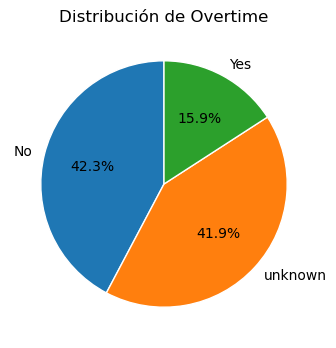

In [386]:
# Como venimos viendo en otra columnas, la mala calidad de la recopilación de datos hace que este 41% de valores nulos en OVERTIME sea muy dificil de gestionar. 
# Creamos nueva categoria para los valores nulos y tendremos en cuenta para el análisis la poca fiabilidad de los datos.
df_talento["overtime"].fillna("unknown", inplace=True)
overtime_counts = df_talento["overtime"].value_counts()

plt.figure(figsize=(4,4))
plt.pie(overtime_counts, labels=overtime_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title("Distribución de Overtime")
plt.show()


In [ ]:
#2️⃣5️⃣ PERCENT SALARY HIKE: es el porcentaje de aumento salarial. 
# Tiene valores esperados para esta columna y sin nulos. Pero nos preocupa que los valores con menor representación puedan ser outliers.
print(df_talento['percent_salary_hike'].unique())
print(df_talento['percent_salary_hike'].describe())
print(df_talento['percent_salary_hike'].value_counts())
print(df_talento['percent_salary_hike'].isnull().sum())


[13 14 11 19 12 25 16 17 22 23 20 15 21 24 18]
count    1614.000000
mean       15.165428
std         3.648610
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: percent_salary_hike, dtype: float64
percent_salary_hike
11    232
13    230
12    225
14    220
15    110
18     98
17     88
16     86
19     82
20     60
22     59
21     51
23     29
24     25
25     19
Name: count, dtype: int64
0


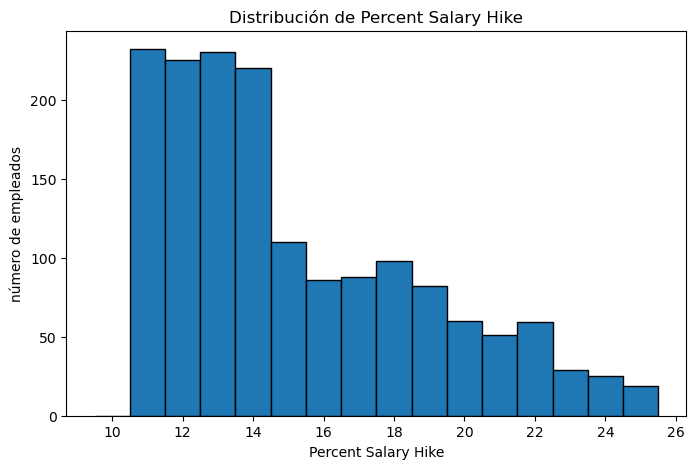

In [388]:
# Hacemos un gráfico para ver el tipo de distribución y comprobamos que la mayoria se mueve en un rango comprendido entre 11 y 14.
plt.figure(figsize=(8,5))
plt.hist(df_talento['percent_salary_hike'], bins=range(10, 27), edgecolor='black', align='left')
plt.xlabel("Percent Salary Hike")
plt.ylabel("número de empleados")
plt.title("Distribución de Percent Salary Hike")
plt.show()


In [389]:
# Al calcular los limites ya nos aseguramos de que aunque aparecen valores más altos, estan dentro de los límites por lo que son valores reales.
q1 = df_talento['percent_salary_hike'].quantile(0.25)
q3 = df_talento['percent_salary_hike'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
print(f'el rango intercuartilico es: {iqr}')
print(f'el limite inferior es: {limite_inferior}')
print(f'el limite superior es: {limite_superior}')


el rango intercuartilico es: 6.0
el limite inferior es: 3.0
el limite superior es: 27.0


In [ ]:
#2️⃣6️⃣ PERFORMANCE RATING: Mide la productividad de los trabajadores, que se encuentra entre valores 3 y 4. 
# Tiene un 12% de nulos.
print(df_talento['performance_rating'].unique())
print(df_talento['performance_rating'].value_counts())
print(df_talento['performance_rating'].isnull().sum())


['3,0' '4,0' nan]
performance_rating
3,0    1205
4,0     214
Name: count, dtype: int64
195


In [ ]:
# Los valores son object procedemos a pasarlos a numéricos para poder gestionar los nulos.
df_talento['performance_rating'] = df_talento['performance_rating'].astype(str).str.replace(',', '.').astype(float)
print(df_talento['performance_rating'].unique())
print(df_talento['performance_rating'].dtype)


[ 3.  4. nan]
float64


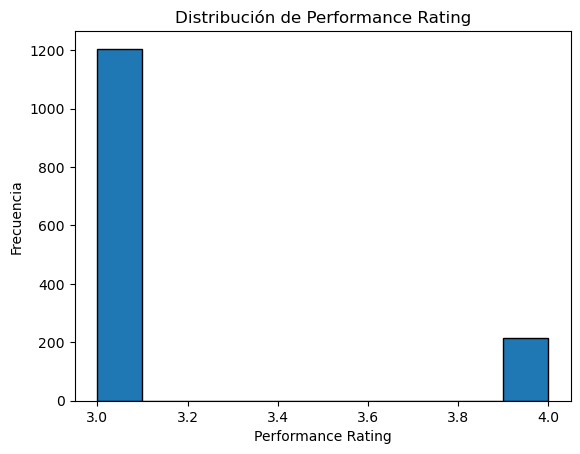

In [392]:
# Hacemos un gráfico para ver la distribución de la variable.
plt.hist(df_talento['performance_rating'], bins=10, edgecolor='black')
plt.title('Distribución de Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# Al ser muy asimetrica y poco variable, decidimos reeemplazar los nulos con la mediana para respetar la tendencia de la variable y verificamos.
df_talento['performance_rating'].fillna(df_talento['performance_rating'].median(), inplace=True)
print(df_talento['performance_rating'].unique())
print(df_talento['performance_rating'].value_counts())
print(df_talento['performance_rating'].isnull().sum()) 


[3. 4.]
performance_rating
3.0    1400
4.0     214
Name: count, dtype: int64
0


In [ ]:
#2️⃣7️⃣ RELATIONSHIP SATISFACTION: Es una escala de valores del 1 al 4 que valora de menor a mayor el nivel de satisfacción de las relaciones interpersonales del empleado.
# Tiene valores dentro de los esperado.
print(df_talento['relationship_satisfaction'].unique())
print(df_talento['relationship_satisfaction'].describe())
print(df_talento['relationship_satisfaction'].value_counts())
print(df_talento['relationship_satisfaction'].isnull().sum())


[3 1 4 2]
count    1614.000000
mean        2.704461
std         1.079031
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: relationship_satisfaction, dtype: float64
relationship_satisfaction
3    504
4    468
2    339
1    303
Name: count, dtype: int64
0


In [ ]:
#2️⃣8️⃣ STANDAR HOURS: Nos indica las horas de trabajo, osea si el tipo de trabajo es 'full time' o 'part time'.
print(df_talento['standard_hours'].unique())
print(df_talento['standard_hours'].value_counts())
print(df_talento['standard_hours'].isnull().sum())


[nan '80,0']
standard_hours
80,0    419
Name: count, dtype: int64
1195


In [ ]:
# Encontramos que esta columna solo tiene un tipo de valor y un 74% de nulos. 
# No encontramos que esta columna nos vaya a aportar utilidad en el analisis por lo que tras hablar con el Product Owner, decidimos eliminarla.
df_talento.drop(['standard_hours'], axis=1, inplace=True)
print(df_talento.columns)


Index(['age', 'attrition', 'business_travel', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
       'job_role', 'job_satisfaction', 'marital_status', 'monthly_income',
       'num_companies_worked', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'same_as_monthly_income', 'date_birth', 'salary', 'role_department',
       'num_children', 'remote_work'],
      dtype='object')


In [ ]:
#2️⃣9️⃣ STOCK OPTION LEVEL: Una escala de valores numerica que va de 0 a 3 y que representa una clasificación de nivel en cuanto al número de acciones que tienen los empleados. 
# Parece que está bien y no hay que modificar nada.
print(df_talento['stock_option_level'].unique())
print(df_talento['stock_option_level'].value_counts())
print(df_talento['stock_option_level'].isnull().sum())
print(df_talento['stock_option_level'].describe())


[0 1 2 3]
stock_option_level
0    687
1    666
2    172
3     89
Name: count, dtype: int64
0
count    1614.000000
mean        0.791202
std         0.842396
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: stock_option_level, dtype: float64


In [ ]:
#3️⃣0️⃣ TOTAL WORKING YEARS: Representa numericamente el tiempo que lleva el empleado en la compañia.
print(df_talento['total_working_years'].unique())
print(df_talento['total_working_years'].value_counts())
print(df_talento['total_working_years'].isnull().sum())


[nan '34,0' '22,0' '28,0' '20,0' '21,0' '33,0' '40,0' '18,0' '25,0' '15,0'
 '17,0' '26,0' '16,0' '24,0' '14,0' '23,0' '27,0' '19,0' '11,0' '38,0'
 '37,0' '13,0' '12,0' '29,0' '10,0' '36,0' '35,0' '9,0' '31,0' '32,0'
 '8,0' '7,0' '30,0' '6,0' '5,0' '4,0' '3,0' '2,0' '1,0' '0,0']
total_working_years
10,0    144
8,0      86
6,0      84
9,0      69
5,0      66
7,0      56
4,0      54
1,0      53
12,0     34
3,0      32
14,0     30
13,0     30
11,0     29
15,0     28
16,0     28
20,0     28
18,0     27
21,0     23
17,0     22
2,0      21
22,0     18
19,0     17
24,0     14
23,0     13
28,0     13
26,0      8
0,0       8
29,0      6
36,0      6
25,0      6
33,0      6
37,0      5
27,0      5
31,0      4
30,0      3
32,0      3
35,0      3
40,0      3
34,0      2
38,0      1
Name: count, dtype: int64
526


In [399]:
# Normalizamos valores siguiendo la pauta pactada.
df_talento['total_working_years'] = df_talento['total_working_years'].astype(str).str.replace(',', '.').astype(float)
print(df_talento['total_working_years'].dtype)
print(df_talento['total_working_years'].unique()) 


float64
[nan 34. 22. 28. 20. 21. 33. 40. 18. 25. 15. 17. 26. 16. 24. 14. 23. 27.
 19. 11. 38. 37. 13. 12. 29. 10. 36. 35.  9. 31. 32.  8.  7. 30.  6.  5.
  4.  3.  2.  1.  0.]


In [ ]:
print(df_talento['total_working_years'].describe())


count    1088.000000
mean       11.318934
std         7.727675
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: total_working_years, dtype: float64


Text(0, 0.5, 'Cantidad de Empleados')

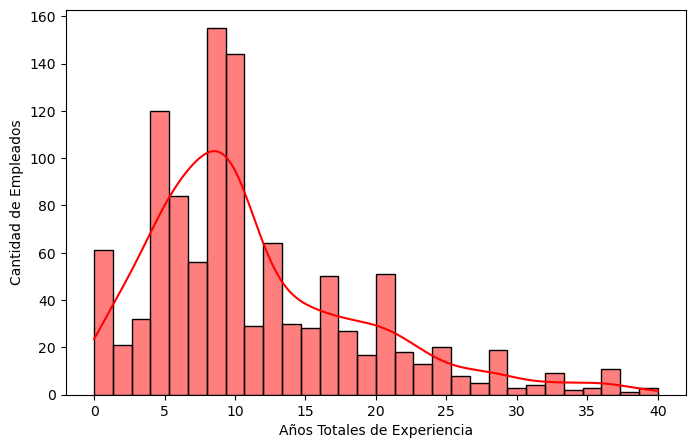

In [ ]:
# Hacemos un gráfico para ver la distribucion de los registros antes de decidir como podemos gestionar el 32% de nulos que tiene la columna.
plt.figure(figsize=(8,5))
sns.histplot(df_talento['total_working_years'], bins=30, kde=True, color="red")
plt.xlabel("Años Totales de Experiencia")
plt.ylabel("Cantidad de Empleados")


🔍 El gráfico nos demuestra que la distribucion es claramente asimétrica con un mayor peso en los valores más bajos. 
Esto nos muestra que la mayoría de los empleados tiene entre 5 y 10 años de antiguedad y que a partir de los 15 años, el número de empleados se reduce considerablemente. 

Decidimos así, como con otras variables, terminar la limpieza general del dataset para gestionar la imputacion de estos valores nulos.

In [ ]:
#3️⃣1️⃣ TRINING LAST YEAR: Indica la cantidad de veces que los empleazos recibieron cursos de formación y vienen representados con una escala del 0 al 6 y con valores válidos.
print(df_talento['training_times_last_year'].unique())
print(df_talento['training_times_last_year'].value_counts())
print(df_talento['training_times_last_year'].isnull().sum())
print(df_talento['training_times_last_year'].describe())


[5 3 2 0 1 4 6]
training_times_last_year
2    598
3    534
4    137
5    136
1     77
6     72
0     60
Name: count, dtype: int64
0
count    1614.000000
mean        2.809789
std         1.297765
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: training_times_last_year, dtype: float64


In [403]:
#3️⃣2️⃣ WORK LIFE BALANCE: Nos da una escala de valores del 1 al 4 que refleja de menor a mayor el equilibrio entre el trabajo y la vida personal del trabajador.
print(df_talento['work_life_balance'].unique())
print(df_talento['work_life_balance'].value_counts())
print(df_talento['work_life_balance'].isnull().sum())


['3,0' nan '2,0' '4,0' '1,0']
work_life_balance
3,0    913
2,0    359
4,0    155
1,0     79
Name: count, dtype: int64
108


In [ ]:
# Convertimos los valores en numéricos y al hacer el .describe vemos que no es una columna nada dispersa y con cierta simetria, y que gran parte de los empleados estan en el nivel 3.
df_talento['work_life_balance'] = df_talento['work_life_balance'].astype(str).str.replace(',', '.').astype(float)
print(df_talento['work_life_balance'].describe())


count    1506.000000
mean        2.759628
std         0.702622
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: work_life_balance, dtype: float64


In [405]:
# Visto esto decidimos imputar los valores nulos con la mediana.
median_value = df_talento['work_life_balance'].median()
df_talento['work_life_balance'].fillna(median_value, inplace=True)
print(df_talento['work_life_balance'].isnull().sum()) 
print(df_talento['work_life_balance'].describe())


0
count    1614.000000
mean        2.775713
std         0.681347
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: work_life_balance, dtype: float64


In [ ]:
#3️⃣3️⃣ YEARS AT COMPANY: Parece tener unos valores dentro de lo esperado y sin errores.
print(df_talento['years_at_company'].unique())
print(df_talento['years_at_company'].value_counts())
print(df_talento['years_at_company'].describe())


[20 33 22 19 21 18 24 31 26 16 23 15 17 32 14 13 25 12 11 37 40 36 27 29
 10  9 30  8  7 34  6  5  4  2  3  1  0]
years_at_company
5     208
1     171
3     141
2     141
10    133
7     115
4     114
8     106
9      94
6      78
0      44
11     36
20     29
13     26
15     21
14     19
22     17
12     15
18     15
16     14
21     14
19     12
17      9
24      7
25      5
33      5
26      4
32      3
27      3
31      3
36      3
29      2
23      2
40      2
34      1
37      1
30      1
Name: count, dtype: int64
count    1614.000000
mean        7.132590
std         6.124237
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: years_at_company, dtype: float64


In [ ]:
#3️⃣4️⃣ YEARS IN CURRENT ROLE: Años en el puesto de trabajo actual.
print(df_talento['years_in_current_role'].unique())
print(df_talento['years_in_current_role'].value_counts())
print(df_talento['years_in_current_role'].isnull().sum())


[nan '13,0' '12,0' '11,0' '7,0' '6,0' '4,0' '3,0' '2,0' '1,0' '0,0']
years_in_current_role
2,0     11
7,0      5
0,0      4
4,0      3
1,0      3
11,0     2
6,0      2
3,0      2
13,0     1
12,0     1
Name: count, dtype: int64
1580


In [ ]:
# Presenta un 97% de nulos y dado que la informacion es redundante decidimos eliminarla.
df_talento.drop(columns=["years_in_current_role"], inplace=True)


In [409]:
#3️⃣5️⃣ YEARS SINCE LAST PROMOTION: Presenta valores dentro de lo esperado y sin errores.
print(df_talento['years_since_last_promotion'].unique())
print(df_talento['years_since_last_promotion'].value_counts())
print(df_talento['years_since_last_promotion'].isnull().sum())


[15 11  5  2  4  7  0  1 13 14  8 12  3  6 10  9]
years_since_last_promotion
0     625
1     384
2     177
7      93
4      67
3      62
5      53
6      37
11     26
8      20
9      18
15     15
12     11
13     10
14     10
10      6
Name: count, dtype: int64
0


In [ ]:
#3️⃣6️⃣ YEARS WITH CURRENT MANAGER: Presenta valores normales dentro de los esperado y sin errores.
print(df_talento['years_with_curr_manager'].unique())
print(df_talento['years_with_curr_manager'].value_counts())
print(df_talento['years_with_curr_manager'].isnull().sum())


[15  9  6  8  7 11 10 12  4  0  5 17  2 14  1 13  3 16]
years_with_curr_manager
2     380
0     270
7     267
3     148
8     115
4     104
1      84
9      70
5      36
10     31
6      30
11     22
12     20
13     16
17      8
15      5
14      5
16      3
Name: count, dtype: int64
0


In [ ]:
#3️⃣7️⃣ SAME AS MONTHLY INCOME: Normalizamos los datos de la columna para poder compararla con monthly income pues sospechamos que tiene los mismos datos.
print(df_talento["same_as_monthly_income"].unique()[:10])
df_talento["same_as_monthly_income"] = (df_talento["same_as_monthly_income"].astype(str).str.replace(",", ".").str.replace(r"[^\d.]", "", regex=True).replace("", np.nan).replace("nan", np.nan).astype(float))
df_talento['monthly_income'].equals(df_talento['same_as_monthly_income'])



['19537,0' '19999,0' '19232,0' '17169,0' nan '17174,0' '16595,0' '19973,0'
 '13402,0' '13206,0']


True

In [412]:
# Al comprobar que son identicas, decidimos eliminarla y verificamos.
df_talento.drop('same_as_monthly_income', axis=1, inplace=True)
print(df_talento.columns)


Index(['age', 'attrition', 'business_travel', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
       'job_role', 'job_satisfaction', 'marital_status', 'monthly_income',
       'num_companies_worked', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'salary', 'role_department',
       'num_children', 'remote_work'],
      dtype='object')


In [ ]:
#3️⃣8️⃣ DATE BIRTH: Nos da unicamente el año de nacimineto y parece estar correcta.
print(df_talento['date_birth'].unique())
print(df_talento['date_birth'].isnull().sum())


[1972 1971 1981 1976 1977 1975 1964 1982 1967 1985 1968 1983 1965 1988
 1978 1990 1987 1989 1970 1980 1963 1991 1986 1974 1984 1973 1979 1993
 1994 1992 1969 1966 1996 1995 1997 1998 1999 2000 2001 2002 2003 2004
 2005]
0


In [ ]:
#3️⃣9️⃣ SALARY: Es una columna que no nos aporta información, por lo que decidimos eliminarla.
print(df_talento['salary'].unique())
print(df_talento['salary'].value_counts())
df_talento.drop(columns=['salary'], inplace=True)


['1000000000$']
salary
1000000000$    1614
Name: count, dtype: int64


In [415]:
#4️⃣0️⃣ ROLE DEPARTAMENT: Presenta muchísimas inconsistencias.
print(df_talento['role_department'].unique())
print(df_talento['role_department'].value_counts())
print(df_talento['role_department'].isnull().sum())


[nan ' ManaGER  -  Research & Development '
 ' MANAger  -  Research & Development '
 ' heaLtHcArE repResENtATiVe  -  Research & Development '
 ' saLEs exEcutIVe  -  Sales ' ' Sales ExECuTIVe  -  Sales '
 ' heALthCArE RePResEntaTIVe  -  Research & Development '
 ' lABORAtOry tECHnIcIan  -  Research & Development '
 ' ManufactUrINg DiReCTOr  -  Research & Development '
 ' SaleS eXEcUtIVE  -  Sales '
 ' HEaLthcaRe rEprEsEnTAtiVe  -  Research & Development '
 ' rESeArCH sCientIST  -  Research & Development '
 ' healTHCAre rePREseNtATiVE  -  Research & Development '
 ' mANaGer  -  Research & Development '
 ' HEAltHCaRe REPreseNTatIve  -  Research & Development '
 ' SaLeS eXECUTivE  -  Sales '
 ' reSeARCH SCIEnTiST  -  Research & Development '
 ' ReSearch DiRecTOR  -  Research & Development '
 ' resEaRCh SciEnTist  -  Research & Development '
 ' hUmaN REsoUrCes  -  Human Resources '
 ' manAgER  -  Research & Development ' ' SaLES eXeCUtIVE  -  Sales '
 ' reSEarCH scIentISt  -  Research & Dev

In [416]:
# Las normalizamos siguiendo la pauta.
df_talento['role_department'] = df_talento['role_department'].str.strip().str.lower()
print(df_talento['role_department'].nunique())
print(df_talento['role_department'].value_counts())


11
role_department
sales executive  -  sales                               69
research scientist  -  research & development           62
laboratory technician  -  research & development        56
healthcare representative  -  research & development    26
manufacturing director  -  research & development       22
sales representative  -  sales                          17
research director  -  research & development            16
manager  -  research & development                      14
human resources  -  human resources                     14
manager  -  sales                                        5
manager  -  human resources                              1
Name: count, dtype: int64


In [417]:
# La columna 'Role Department' es en realidad la agrupación de las columnas 'job role' y 'department'. 
# Esto nos va a ayudar a rellenar nulos.
df_talento[df_talento['department'] != 'unknown'].groupby('job_role')['department'].value_counts()


job_role                   department            
healthcare representative  research_&_development    26
human resources            human_resources           14
laboratory technician      research_&_development    56
manager                    research_&_development    14
                           sales                      5
                           human_resources            1
manufacturing director     research_&_development    22
research director          research_&_development    16
research scientist         research_&_development    62
sales executive            sales                     69
sales representative       sales                     17
Name: count, dtype: int64

In [ ]:
# Cada job role va asociado a un único departamento, salvo manager que sale en varios. 
# Esto nos va a permitir crear un diccionario con el departamento más común por job role.

dic_job_to_dept = df_talento[df_talento['department'] != 'unknown'].groupby('job_role')['department'].agg(lambda x: x.value_counts().idxmax()).to_dict()
print(dic_job_to_dept)


{'healthcare representative': 'research_&_development', 'human resources': 'human_resources', 'laboratory technician': 'research_&_development', 'manager': 'research_&_development', 'manufacturing director': 'research_&_development', 'research director': 'research_&_development', 'research scientist': 'research_&_development', 'sales executive': 'sales', 'sales representative': 'sales'}


In [419]:
# Con este diccionario vamos a poder rellenar los desconocidos de la columna 'department' de modo mmás coherente y en base a los datos que tenemos.
df_talento.loc[df_talento['department'] == 'unknown', 'department'] = df_talento.loc[df_talento['department'] == 'unknown', 'job_role'].map(dic_job_to_dept)

# Verificamos y comprobamos si aun nos quedan 'unknown'.
print(df_talento['department'].value_counts())
print("En la columna departamento quedan UNKNOWN:", (df_talento['department'] == 'unknown').sum())


department
research_&_development    1092
sales                      464
human_resources             58
Name: count, dtype: int64
En la columna departamento quedan UNKNOWN: 0


In [420]:
# Ahora que ya tenemos los nulos de 'department' la columna 'role_departament' es redundante por lo que, procedemos a eliminarla.
df_talento.drop('role_department', axis=1, inplace=True)


In [ ]:
#4️⃣1️⃣ NUMBER OF CHILDREN: No tiene datos  por lo que procedemos a eliminarla.
print(df_talento['num_children'].unique())
print(df_talento['num_children'].value_counts())
df_talento.drop(columns=["num_children"], inplace=True)


[nan]
Series([], Name: count, dtype: int64)


In [ ]:
#4️⃣2️⃣ REMOTE WORK: Nos indica si los empleados trabajan en remoto o no.
print(df_talento['remote_work'].unique())
print(df_talento['remote_work'].value_counts())
print(df_talento['remote_work'].info())


['Yes' '1' 'False' '0' 'True']
remote_work
1        360
True     345
0        309
False    305
Yes      295
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 1614 entries, 0 to 1613
Series name: remote_work
Non-Null Count  Dtype 
--------------  ----- 
1614 non-null   object
dtypes: object(1)
memory usage: 12.7+ KB
None


In [ ]:
# vemos que presentan varios resultados por lo que los vamos a normalizar siguiendo logica binaria y comprobamos.
df_talento['remote_work'] = df_talento['remote_work'].replace({
  "Yes": "yes",
   1 : "yes",
   0 : "no",
   "1": "yes",
   "0": "no",
  "True": "yes", 
  "False": "no",
  True: "yes", 
  False: "no"
    })
print(df_talento['remote_work'].value_counts())


remote_work
yes    1000
no      614
Name: count, dtype: int64


### **GESTIÓN DE NULOS Y DUPLICADOS**
 Una vez ya hemos normalizados todos los valores y gestionados nulos categóricos y numéricos en bajo porcentaje. Vamos a pasar tratar duplicados y los amplios porcentajes de nulos de las columnas que más nos preocupaban: 
- employee_number
- monthly_income 
- total_working_years

In [ ]:
df_talento.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1614 non-null   int32  
 1   attrition                   1614 non-null   object 
 2   business_travel             1614 non-null   object 
 3   department                  1614 non-null   object 
 4   distance_from_home          1614 non-null   int64  
 5   education                   1614 non-null   int64  
 6   education_field             1614 non-null   object 
 7   employee_number             1614 non-null   object 
 8   environment_satisfaction    1614 non-null   int64  
 9   gender                      1614 non-null   object 
 10  job_involvement             1614 non-null   int64  
 11  job_level                   1614 non-null   int64  
 12  job_role                    1614 non-null   object 
 13  job_satisfaction            1614 

In [ ]:
null_percent = (df_talento.isnull().sum() / len(df_talento) * 100).sort_values(ascending=False)
null_percent[null_percent > 0]


monthly_income         52.230483
total_working_years    32.589839
dtype: float64

### Employee Number

In [426]:
# Como anteriormente sustituimos todos los nulos por 'unknown', ahora vamos a gestionar los duplicados de 'employee_number'. 
# Para poder gestionar los duplicados de modo correcto vamos a separar los employee_number reales de los 'unknown' y ver cuantos hay en cada uno.
df_reales = df_talento[df_talento['employee_number'] != 'unknown']
df_unknowns = df_talento[df_talento['employee_number'] == 'unknown']
print("Antes de limpiar duplicados...")
print("Empleados con employee_number REAL:", df_reales.shape[0])
print("Empleados con employee_number 'unknown':", df_unknowns.shape[0])
print("TOTAL empleados:", df_reales.shape[0] + df_unknowns.shape[0])


Antes de limpiar duplicados...
Empleados con employee_number REAL: 1183
Empleados con employee_number 'unknown': 431
TOTAL empleados: 1614


In [427]:
# Despues pasamos a eliminar los duplicados solo en los reales y ver como queda tras esa eliminacion.
df_reales = df_reales.drop_duplicates(subset='employee_number', keep='first')
print("Empleados con employee_number REAL:", df_reales.shape[0])
print("Empleados con employee_number 'unknown':", df_unknowns.shape[0])
print("TOTAL empleados:", df_reales.shape[0] + df_unknowns.shape[0])


Empleados con employee_number REAL: 1079
Empleados con employee_number 'unknown': 431
TOTAL empleados: 1510


In [ ]:
# Unimos de nuevo y verificamos
df_talento_final = pd.concat([df_reales, df_unknowns], ignore_index=True)
print("DataFrame final consolidado:")
print("TOTAL empleados:", df_talento_final.shape[0])
df_talento_final.info()


DataFrame final consolidado:
TOTAL empleados: 1510
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1510 non-null   int32  
 1   attrition                   1510 non-null   object 
 2   business_travel             1510 non-null   object 
 3   department                  1510 non-null   object 
 4   distance_from_home          1510 non-null   int64  
 5   education                   1510 non-null   int64  
 6   education_field             1510 non-null   object 
 7   employee_number             1510 non-null   object 
 8   environment_satisfaction    1510 non-null   int64  
 9   gender                      1510 non-null   object 
 10  job_involvement             1510 non-null   int64  
 11  job_level                   1510 non-null   int64  
 12  job_role                    1510 non-nu

In [ ]:
df_talento = df_talento_final


In [ ]:
df_talento.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1510 non-null   int32  
 1   attrition                   1510 non-null   object 
 2   business_travel             1510 non-null   object 
 3   department                  1510 non-null   object 
 4   distance_from_home          1510 non-null   int64  
 5   education                   1510 non-null   int64  
 6   education_field             1510 non-null   object 
 7   employee_number             1510 non-null   object 
 8   environment_satisfaction    1510 non-null   int64  
 9   gender                      1510 non-null   object 
 10  job_involvement             1510 non-null   int64  
 11  job_level                   1510 non-null   int64  
 12  job_role                    1510 non-null   object 
 13  job_satisfaction            1510 

### Monthly Income

In [ ]:
# Vamos a comprobar los valores nulos, las estadísticas básicas de esta columna.
print("Valores nulos en 'monthly_income':", df_talento['monthly_income'].isnull().sum())
print(df_talento['monthly_income'].describe())


Valores nulos en 'monthly_income': 799
count      711.000000
mean      6527.918425
std       4810.541121
min       1009.000000
25%       2906.500000
50%       4850.000000
75%       8456.000000
max      19999.000000
Name: monthly_income, dtype: float64


In [ ]:
# Vamos a gestionar este nulo, con imputación avanzada.
monthly_income_iter= IterativeImputer(max_iter = 100, random_state = 42)
df_talento['monthly_income'] = monthly_income_iter.fit_transform(df_talento[['monthly_income']])


### Total Working Years

In [ ]:
# Vamos a comprobar los valores nulos, las estadísticas básicas de esta columna.
print("Valores nulos en total working years:", df_talento['total_working_years'].isnull().sum())
print(df_talento['total_working_years'].describe())


Valores nulos en total working years: 494
count    1016.000000
mean       11.314961
std         7.794100
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: total_working_years, dtype: float64


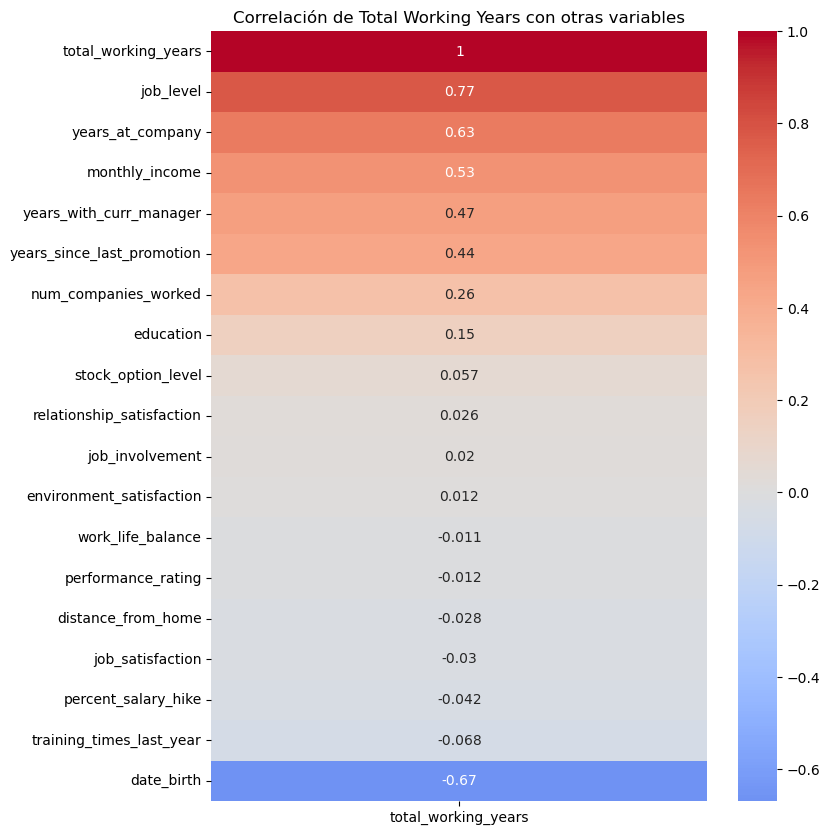

In [ ]:
# Hacemos un mapa de calor para ver cuales son las variables que mayor relacion tienen.
df_numeric = df_talento.select_dtypes(include=['float64', 'int64'])
corr = df_numeric.corr()
corr_total_working_years = corr[['total_working_years']].sort_values(by='total_working_years', ascending=False)
plt.figure(figsize=(8, 10))
sns.heatmap(corr_total_working_years, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de Total Working Years con otras variables')
plt.show()



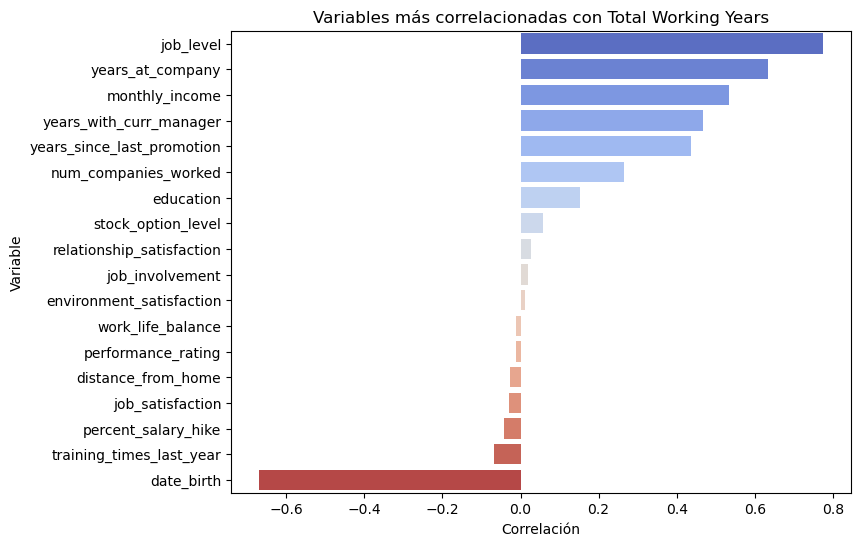

In [450]:
# Un grafico de barras de correlacion a modo de ranking.
corr = df_numeric.corr()['total_working_years'].drop('total_working_years').sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Variables más correlacionadas con Total Working Years')
plt.xlabel('Correlación')
plt.ylabel('Variable')
plt.show()


In [451]:
# Esto nos da las variables con mayor relación para poder usarlar en la imputacion avanzada.
varia_working_years = ['total_working_years', 'job_level', 'monthly_income', 'age', 'years_at_company', 'years_with_curr_manager', 'years_since_last_promotion']
df_knn_imputer = df_talento[varia_working_years]
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputado = knn_imputer.fit_transform(df_knn_imputer)
df_talento['total_working_years'] = df_knn_imputado[:, 0]

print("Nulos en total_working_years después de la imputación:", df_talento['total_working_years'].isnull().sum())
print(df_talento['total_working_years'].describe())


Nulos en total_working_years después de la imputación: 0
count    1510.000000
mean       11.359735
std         7.500844
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: total_working_years, dtype: float64


In [452]:
# Comprobamos que no hay nulos.
df_talento.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1510 non-null   int32  
 1   attrition                   1510 non-null   object 
 2   business_travel             1510 non-null   object 
 3   department                  1510 non-null   object 
 4   distance_from_home          1510 non-null   int64  
 5   education                   1510 non-null   int64  
 6   education_field             1510 non-null   object 
 7   employee_number             1510 non-null   object 
 8   environment_satisfaction    1510 non-null   int64  
 9   gender                      1510 non-null   object 
 10  job_involvement             1510 non-null   int64  
 11  job_level                   1510 non-null   int64  
 12  job_role                    1510 non-null   object 
 13  job_satisfaction            1510 

In [453]:
# Una vez todo limpio vemos que hay columnas que teniamos en float porque tenian nulos, pero al ser escalas de valores lo más lógico es que las pasemos a enteros.
cols_to_int = ['performance_rating', 'total_working_years', 'work_life_balance']
for col in cols_to_int:
    df_talento[col] = df_talento[col].round().astype(int)
print("Conversión a int completada")


Conversión a int completada


### FIN del proceso de limpieza y transformación
Ahora ya si podemos guardar nuestro CVS limpio y optimizado.

In [ ]:
filename = 'df_talento_limpio.csv'
df_talento.to_csv(filename, index=False, encoding='utf-8')
ruta = os.path.join(os.getcwd(), filename)
print(f"Dataset limpio y listo guardado en: {ruta}")
print("💃🏻 ¡Limpieza terminada y dataset guardado! 💃🏻")


Dataset limpio y listo guardado en: c:\Users\hermy\Escritorio\ADALAB CURSO\Curso Adalab\MODULO 3\Proyecto\Proyecto\df_talento_limpio.csv
💃🏻 ¡Limpieza terminada y dataset guardado! 💃🏻
